In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
import os
import datetime
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


2024-11-26 14:01:18.297849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
## load the dataset
data= pd.read_csv("default_of_credit_card.csv")
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

In [4]:
# Check for unnecessary columns
print(data.columns)

# Drop the 'Unnamed: 0' column if it's unnecessary
data = data.drop(columns=['Unnamed: 0'])

# Ensure all data types are correctly formatted
data = data.apply(pd.to_numeric, errors='ignore')  # Convert to numeric where applicable

# Separate features and target
X = data.drop(columns=['Y'])  # Features
y = data['Y']  # Target

# Check the updated dataset structure
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')
Features shape: (30001, 23)
Target shape: (30001,)


/var/folders/1v/rgbrl8yj10q39dr4l_r0c8800000gn/T/ipykernel_32933/903872019.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')  # Convert to numeric where applicable


In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [6]:
# Convert all columns to numeric if possible
data = data.apply(pd.to_numeric, errors='coerce')  # Replace non-numeric values with NaN
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  float64
 1   X2      30000 non-null  float64
 2   X3      30000 non-null  float64
 3   X4      30000 non-null  float64
 4   X5      30000 non-null  float64
 5   X6      30000 non-null  float64
 6   X7      30000 non-null  float64
 7   X8      30000 non-null  float64
 8   X9      30000 non-null  float64
 9   X10     30000 non-null  float64
 10  X11     30000 non-null  float64
 11  X12     30000 non-null  float64
 12  X13     30000 non-null  float64
 13  X14     30000 non-null  float64
 14  X15     30000 non-null  float64
 15  X16     30000 non-null  float64
 16  X17     30000 non-null  float64
 17  X18     30000 non-null  float64
 18  X19     30000 non-null  float64
 19  X20     30000 non-null  float64
 20  X21     30000 non-null  float64
 21  X22     30000 non-null  float64
 22

In [7]:
# Check for Class Imbalance
print(y.value_counts(normalize=True))

Y
0                             0.778774
1                             0.221193
default_payment_next_month    0.000033
Name: proportion, dtype: float64



## **Cleaning the Dataset**

- Remove any rows with invalid labels (e.g., `default_payment_next_month`).

- Ensure all columns are numeric where applicable.

In [8]:
# Remove invalid labels
data = data[data['Y'].isin([0, 1])]  # Keep only rows with labels 0 or 1
y = data['Y']  # Update target variable
X = data.drop(columns=['Y'])  # Update features dataset

In [9]:
# Convert all columns to numeric (if not already)
X = X.apply(pd.to_numeric, errors='coerce')

# Verify the changes
print(f"New Target Distribution:\n{y.value_counts(normalize=True)}\n")
print(f"Dataset Info After Cleaning:\n{X.info()}\n")

New Target Distribution:
Y
0.0    0.7788
1.0    0.2212
Name: proportion, dtype: float64

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  float64
 1   X2      30000 non-null  float64
 2   X3      30000 non-null  float64
 3   X4      30000 non-null  float64
 4   X5      30000 non-null  float64
 5   X6      30000 non-null  float64
 6   X7      30000 non-null  float64
 7   X8      30000 non-null  float64
 8   X9      30000 non-null  float64
 9   X10     30000 non-null  float64
 10  X11     30000 non-null  float64
 11  X12     30000 non-null  float64
 12  X13     30000 non-null  float64
 13  X14     30000 non-null  float64
 14  X15     30000 non-null  float64
 15  X16     30000 non-null  float64
 16  X17     30000 non-null  float64
 17  X18     30000 non-null  float64
 18  X19     30000 non-null  float64
 19  X20     30000 non-null  f

## **Handle Missing Values**
- Check for missing values introduced during the cleaning process and impute or remove them as needed.

In [10]:

# Check for missing values
missing_values = X.isnull().sum()
print(f"Missing Values:\n{missing_values[missing_values > 0]}\n")

# Fill missing values with the median (or another strategy)
X.fillna(X.median(), inplace=True)


Missing Values:
Series([], dtype: int64)




### **Class Balancing**

- Apply oversampling or SMOTE to handle the class imbalance.

In [11]:


#### Oversampling:

from imblearn.over_sampling import RandomOverSampler

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_balanced, y_balanced = oversampler.fit_resample(X, y)

# Verify the new distribution
print(f"New Target Distribution After Oversampling:\n{y_balanced.value_counts(normalize=True)}\n")


New Target Distribution After Oversampling:
Y
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64



# **ANN IMPLEMENTATION**

## **Feature Scaling:**
- Scale the features to standardize their ranges. This is particularly important for algorithms like ANN, which are sensitive to feature scaling.



In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_balanced_scaled = scaler.fit_transform(X_balanced)

**Splitting the Data:**
   - Split the balanced dataset into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
       X_balanced_scaled, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
   )

**Setup Callbacks**

To improve your model training, let's incorporate callbacks like EarlyStopping to avoid overfitting and TensorBoard for visualizing the training process in real-time.

1. EarlyStopping Callback
EarlyStopping monitors a specific metric (like validation loss) and stops the training when it no longer improves, preventing overfitting.

2. TensorBoard Callback
TensorBoard allows you to visualize training metrics like loss, accuracy, and others during the model training process.

In [14]:

# Create directories for TensorBoard logs
log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.makedirs(log_dir, exist_ok=True)

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',               # Monitor the validation loss
    patience=5,                        # Stop after 5 epochs with no improvement
    restore_best_weights=True,         # Restore best model weights
    verbose=1
)

# TensorBoard callback
tensorboard_callback = TensorBoard(
    log_dir=log_dir,                   # Path for logs
    histogram_freq=1,                   # Log histograms every epoch
    write_graph=True,                   # Log the model graph
    write_images=True                   # Log weights as images
)


In [15]:
## Load Tensorboard Extension
%load_ext tensorboard

In [16]:
%tensorboard --logdir=logs/fit

**Building the Artificial Neural Network (ANN):**

- Design and train an ANN to classify the default payment cases.

In [17]:
# Build the ANN
model = Sequential([
      Dense(64, activation='relu', input_dim=X_train.shape[1]),
      Dropout(0.3),
      Dense(32, activation='relu'),
      Dropout(0.3),
      Dense(1, activation='sigmoid')  # Output layer for binary classification
   ])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1536      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3649 (14.25 KB)
Trainable params: 3649 (14.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The model summary shows the architecture of the neural network you've built. Here's a breakdown of each layer:

1. **Dense Layer (64 units)**:
   - The first layer has 64 neurons.
   - It connects to all the neurons from the input layer, with a total of 1536 parameters (input features × units + bias term).

2. **Dropout Layer (rate=0.2)**:
   - This dropout layer will randomly "drop" 20% of the neurons during training to prevent overfitting.

3. **Dense Layer (32 units)**:
   - The second dense layer has 32 neurons, and it has 2080 parameters (input features from the previous layer × units + bias term).

4. **Dropout Layer (rate=0.2)**:
   - Another dropout layer that will drop 20% of neurons.

5. **Dense Layer (1 unit)**:
   - The final dense layer has a single neuron, as this is a binary classification task.
   - It has 33 parameters (32 units from the previous layer + 1 bias term).


In [18]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN with callbacks
history = model.fit(
    X_train, y_train,
    epochs=50,               # Number of epochs
    batch_size=32,           # Batch size
    validation_split=0.2,    # Use 20% of the data for validation
    callbacks=[early_stopping, tensorboard_callback],  # Add callbacks here
    verbose=1
)

Epoch 1/50
935/935 [==============================] - 5s 4ms/step - loss: 0.6225 - accuracy: 0.6603 - val_loss: 0.5816 - val_accuracy: 0.7001
Epoch 2/50
935/935 [==============================] - 3s 3ms/step - loss: 0.5911 - accuracy: 0.6907 - val_loss: 0.5722 - val_accuracy: 0.7035
Epoch 3/50
935/935 [==============================] - 3s 3ms/step - loss: 0.5801 - accuracy: 0.6964 - val_loss: 0.5677 - val_accuracy: 0.7068
Epoch 4/50
935/935 [==============================] - 2s 3ms/step - loss: 0.5742 - accuracy: 0.7011 - val_loss: 0.5644 - val_accuracy: 0.7131
Epoch 5/50
935/935 [==============================] - 2s 2ms/step - loss: 0.5705 - accuracy: 0.7036 - val_loss: 0.5612 - val_accuracy: 0.7137
Epoch 6/50
935/935 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.7043 - val_loss: 0.5626 - val_accuracy: 0.7137
Epoch 7/50
935/935 [==============================] - 3s 3ms/step - loss: 0.5658 - accuracy: 0.7054 - val_loss: 0.5594 - val_accuracy: 0.7150
Epoch 

**TensorBoard Visualization**

After training, you can launch TensorBoard to view the training and validation metrics from the terminal


"tensorboard --logdir=logs/fit"


**Save the model**

In [19]:
# Save the model
model.save('my_model.keras')  # Save in Keras format



**Evaluate the Model:**

- Assess the performance of your ANN on the test data.

In [21]:



# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
 



Test Accuracy: 0.7168


**Plot Metrics:**
- Visualize the training process (e.g., loss and accuracy curves).




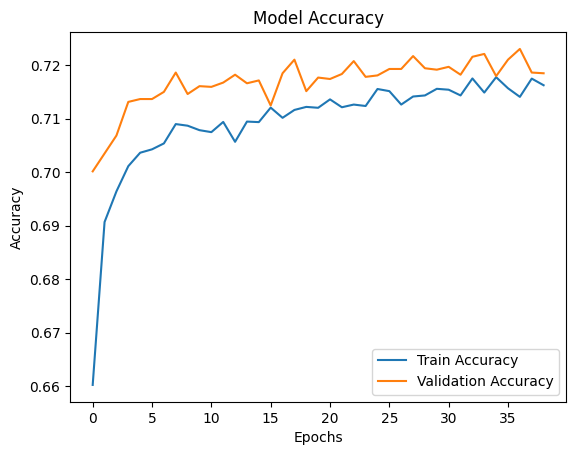

In [22]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


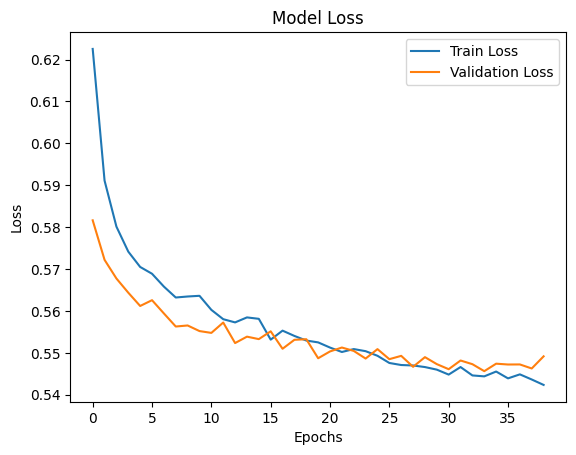

In [23]:
# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

**Load and compile the model for future use**

In [20]:
# Load the saved model
model = load_model('my_model.keras')

# Manually compile the model if needed
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


**Create FastAPI for deployment**

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
from tensorflow.keras.models import load_model
from typing import List

# Initialize the FastAPI app
app = FastAPI()

# Load the pre-trained model
model = load_model('my_model.keras')

# Define a Pydantic model for incoming requests, with a list of float features
class InputData(BaseModel):
    features: List[float]  # Expecting a list of float numbers

@app.post("/predict")
def predict(data: InputData):
    # Convert the input data into a numpy array and reshape for prediction
    input_data = np.array(data.features).reshape(1, -1)  # Ensure it's 2D (1 sample, N features)
    
    # Make prediction
    prediction = model.predict(input_data)
    
    # Return the prediction in a format that can be easily consumed (float)
    return {"prediction": float(prediction[0][0])}

# To run the app, execute this in terminal:
# uvicorn app:app --reload



**Test the /predict endpoint by submitting sample data in JSON format. Here's an example of the input:**

{
    "LIMIT_BAL": 100000,

    "SEX": 2,

    "EDUCATION": 2,

    "MARRIAGE": 1,

    "AGE": 25,

    "PAY_0": 0,

    "PAY_2": 0,

    "PAY_3": 0,

    "PAY_4": 0,

    "PAY_5": 0,

    "PAY_6": 0,

    "BILL_AMT1": 50000,

    "BILL_AMT2": 48000,

    "BILL_AMT3": 47000,

    "BILL_AMT4": 46000,

    "BILL_AMT5": 45000,

    "BILL_AMT6": 44000,

    "PAY_AMT1": 10000,

    "PAY_AMT2": 12000,

    "PAY_AMT3": 15000,

    "PAY_AMT4": 13000,

    "PAY_AMT5": 11000,
    
    "PAY_AMT6": 10000
}
